# Influences of Climatic Patterns on the Food Chain Supply in Kenya

Understanding how climatic factors impact food production and prices is crucial for ensuring food security. This analysis explores the relationships between key agricultural variables and climatic patterns in Kenya from 2002 to 2025.

---

## 1. Introduction

In this notebook, we'll perform an Exploratory Data Analysis (EDA) on the dataset to uncover insights about:

- Trends in food production and crop prices over time.
- The impact of temperature and rainfall on food production and prices.
- Relationships between different crops' prices.
- Anomalies and volatility in the data.

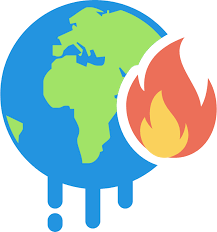


## 2. Data Loading and Preprocessing

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.preprocessing import StandardScaler


# Using forward slashes
agriculture_data = pd.read_csv('C:/Users/Kipruto/Desktop/Climate-Impact-Prediction/data/MergedDataset/cleaned-foodproduction.csv')
market_prices = pd.read_csv('C:/Users/Kipruto/Desktop/Climate-Impact-Prediction/data/MergedDataset/MergedPrices.csv')
climate_data = pd.read_csv('C:/Users/Kipruto/Desktop/Climate-Impact-Prediction/data/MergedDataset/cleaned-climate.csv')

print(agriculture_data.head())
print(market_prices.head())
print(climate_data.head())

   Year  Food Production Index
0  2002                3045518
1  2003                3351497
2  2004                3199022
3  2005                3585080
4  2006                3936250
   Year  Beans_Price_90KG  Maize_Price_90KG  Potatoes_Price_50KG  \
0  2002              2462              1300                  431   
1  2003              2771              1415                  566   
2  2004              3080              1530                  701   
3  2005              3389              1645                  835   
4  2006              3244              1388                  892   

   Rice_Price_50KG  
0                0  
1                0  
2                0  
3                0  
4                0  
   Year  Temperature - (Celsius)  Rainfall (mm/year)
0  2002                       25                  99
1  2003                       24                 104
2  2004                       25                  91
3  2005                       25                  89
4  2006       

## 4. Merge the datasets using common Key

In [2]:
#merge the datasets using common key Year
import pandas as pd
data = pd.merge(agriculture_data, market_prices, on='Year', how='inner')
data = pd.merge(data, climate_data, on='Year', how='inner')


# Save the merged dataset

save_data = r'C:\Users\Kipruto\Desktop\Climate-Impact-Prediction\data\MergedDataset\data.csv'
data.to_csv(save_data, index=False)

data = pd.read_csv(save_data)      


## 5. Data Understanding

Let's take a glimpse at the dataset to understand its structure and contents.


In [3]:
# Display the first few rows
data.head()


,Year,Food Production Index,Beans_Price_90KG,Maize_Price_90KG,Potatoes_Price_50KG,Rice_Price_50KG,Temperature - (Celsius),Rainfall (mm/year)
0,2002,3045518,2462,1300,431,0,25,99
1,2003,3351497,2771,1415,566,0,24,104
2,2004,3199022,3080,1530,701,0,25,91
3,2005,3585080,3389,1645,835,0,25,89
4,2006,3936250,3244,1388,892,0,25,100


In [4]:
#checking for missing values
data.isnull().sum()

Year                       0
Food Production Index      0
Beans_Price_90KG           0
Maize_Price_90KG           0
Potatoes_Price_50KG        0
Rice_Price_50KG            0
Temperature - (Celsius)    0
Rainfall (mm/year)         0
dtype: int64

In [5]:
data.dtypes

Year                       int64
Food Production Index      int64
Beans_Price_90KG           int64
Maize_Price_90KG           int64
Potatoes_Price_50KG        int64
Rice_Price_50KG            int64
Temperature - (Celsius)    int64
Rainfall (mm/year)         int64
dtype: object

### Observations:

- The dataset spans from 2002 to 2025.
- It includes agricultural production indices, crop prices, and climatic data.
- There are no missing values after preprocessing.


## 6. Descriptive Statistics

Understanding the basic statistics helps in grasping the data distribution.


In [6]:
# Summary statistics
data.describe()


,Year,Food Production Index,Beans_Price_90KG,Maize_Price_90KG,Potatoes_Price_50KG,Rice_Price_50KG,Temperature - (Celsius),Rainfall (mm/year)
count,24.000000,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2013.500000,4.024308e+06,6013.458333,2623.250000,1980.333333,1641.291667,25.541667,104.541667
std,7.071068,6.393270e+05,2222.105288,905.807315,964.872493,3324.940450,0.721060,14.243165
min,2002.000000,2.866111e+06,2462.000000,1203.000000,431.000000,0.000000,24.000000,78.000000
25%,2007.750000,3.606646e+06,4149.500000,1686.250000,1155.000000,0.000000,25.000000,97.000000
50%,2013.500000,4.013880e+06,6373.500000,2741.500000,1924.500000,0.000000,25.500000,100.000000
75%,2019.250000,4.620231e+06,7584.250000,3278.250000,2693.000000,0.000000,26.000000,112.000000
max,2025.000000,4.881293e+06,9565.000000,3947.000000,3529.000000,9650.000000,27.000000,150.000000


### Insights:

- Notice the mean, median, and standard deviation for each variable.
- Observe any significant differences between the mean and median, indicating skewness.


## 7. Visualizations

Visual explorations to uncover patterns and trends in the data.

### 7.1 Food Production Index Over Years


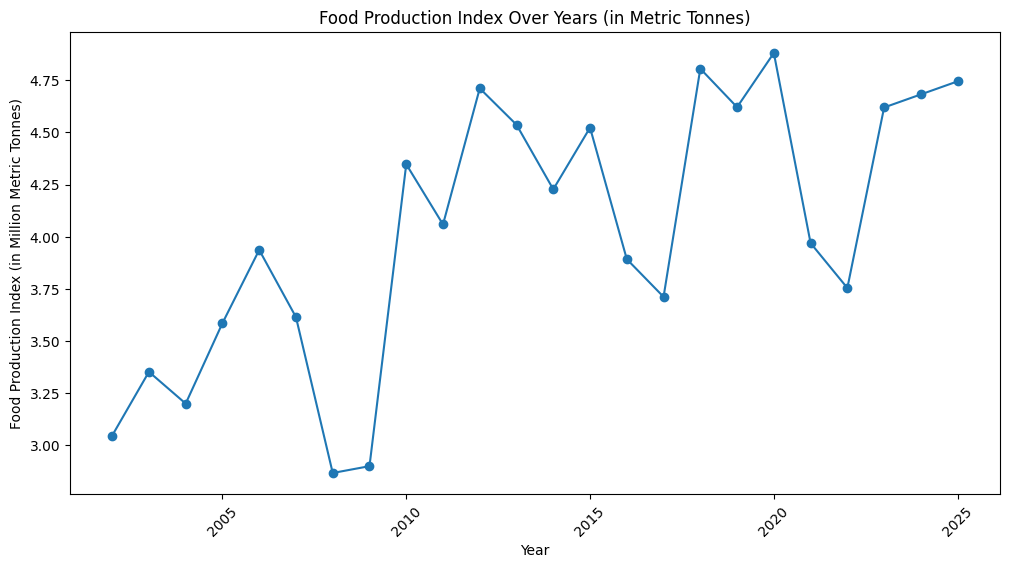

In [7]:
plt.figure(figsize=(12,6))
plt.plot(data['Year'], data['Food Production Index'] / 1e6, marker='o', linestyle='-')
plt.title('Food Production Index Over Years (in Metric Tonnes)')
plt.xlabel('Year')
plt.ylabel('Food Production Index (in Million Metric Tonnes)')
plt.xticks(rotation=45)
plt.show()


**Observation:**

- Identify periods of increase or decrease in food production.
- Spot any irregularities or significant changes.


### 7.2 Crop Prices Over Years


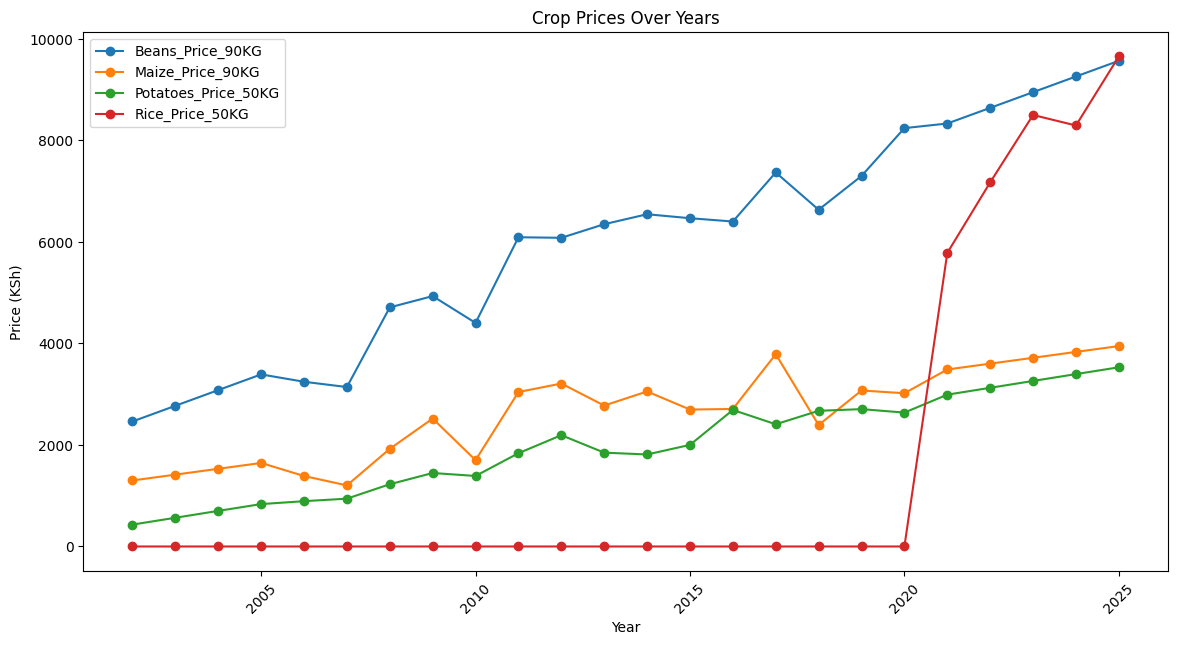

In [8]:
plt.figure(figsize=(14,7))
for crop in ['Beans_Price_90KG', 'Maize_Price_90KG', 'Potatoes_Price_50KG', 'Rice_Price_50KG']:
    plt.plot(data['Year'], data[crop], marker='o', linestyle='-', label=crop)
plt.title('Crop Prices Over Years')
plt.xlabel('Year')
plt.ylabel('Price (KSh)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


**Observation:**

- Compare the price trends of different crops.
- Notice any simultaneous price spikes or drops.


### 7.3 Temperature and Rainfall Over Years


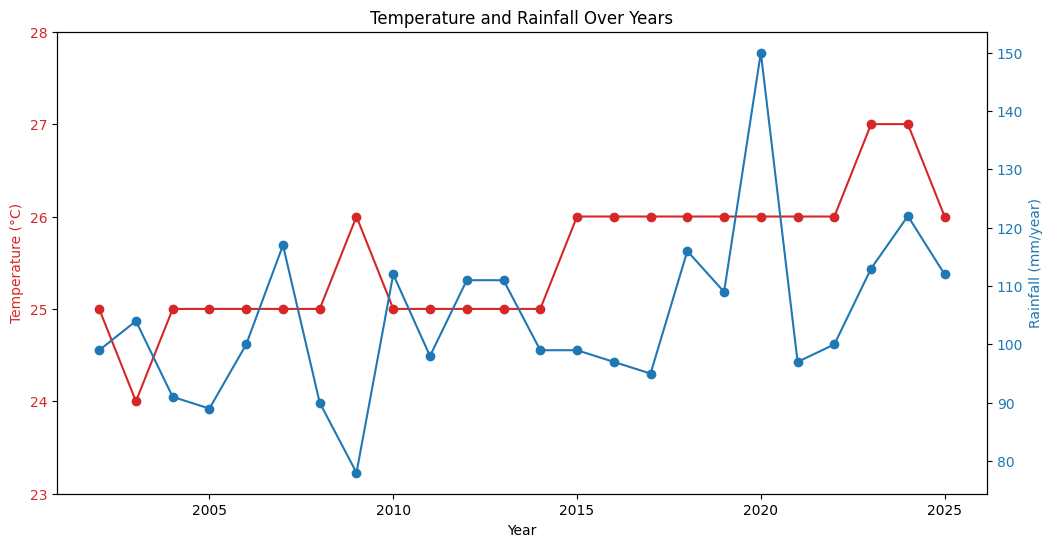

In [9]:
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.plot(data['Year'], data['Temperature - (Celsius)'], color='tab:red', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_ylim(23, 28)

ax2 = ax1.twinx()
ax2.set_ylabel('Rainfall (mm/year)', color='tab:blue')
ax2.plot(data['Year'], data['Rainfall (mm/year)'], color='tab:blue', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Temperature and Rainfall Over Years')
plt.xticks(rotation=45)
plt.show()


**Observation:**

- Observe the interplay between temperature and rainfall over the years.
- Identify any unusual climatic patterns.


### 7.4 Scatter Plots with Trend Lines

#### 7.4.1 Food Production Index vs. Temperature


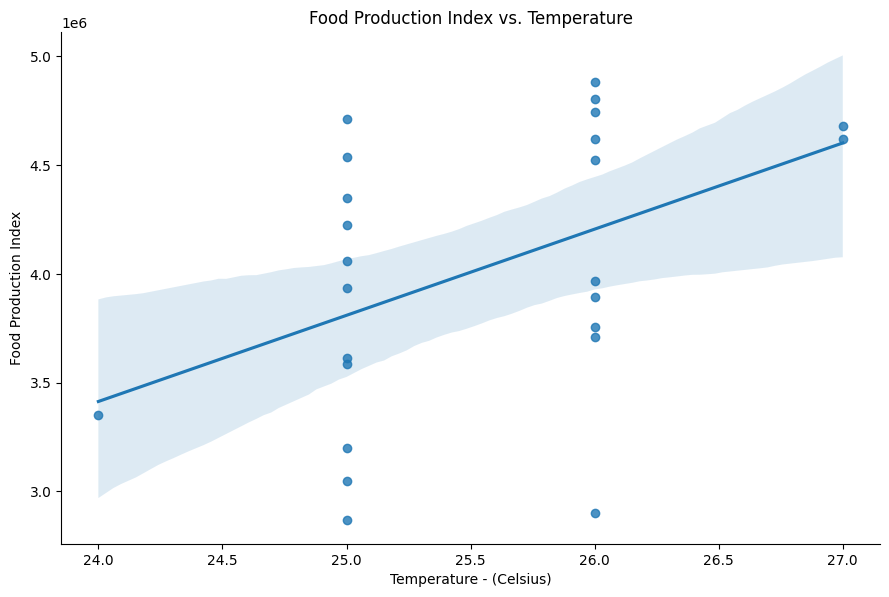

In [10]:
sns.lmplot(x='Temperature - (Celsius)', y='Food Production Index', data=data, height=6, aspect=1.5)
plt.title('Food Production Index vs. Temperature')
plt.show()


**Observation:**

- Assess the relationship between temperature and food production.
- The regression line indicates the trend direction and strength.


#### 7.4.2 Food Production Index vs. Rainfall


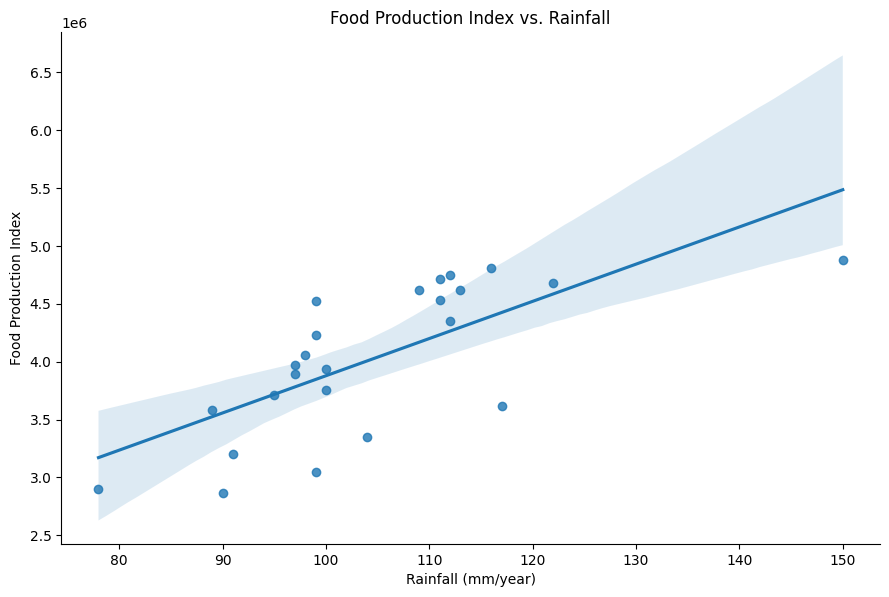

In [11]:
sns.lmplot(x='Rainfall (mm/year)', y='Food Production Index', data=data, height=6, aspect=1.5)
plt.title('Food Production Index vs. Rainfall')
plt.show()


**Observation:**

- Evaluate how rainfall impacts food production.
- Note any linear or non-linear relationships.


## 8. Correlation Analysis

A heatmap to visualize correlations between variables.


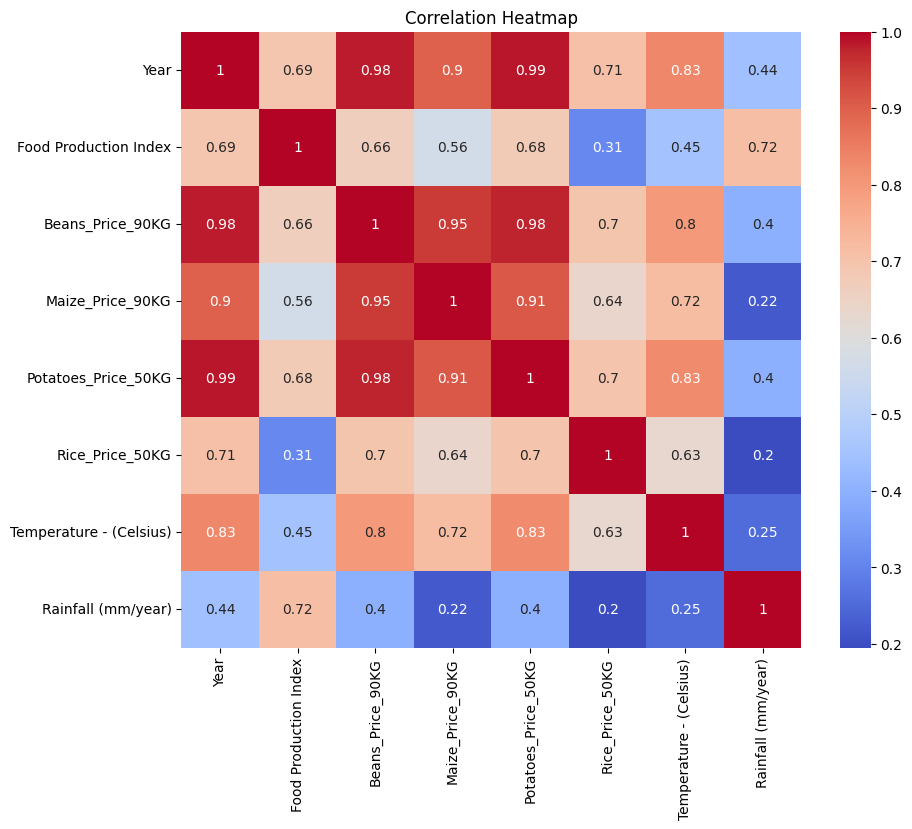

In [12]:
# Calculate correlation matrix
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Insights:**

- Strong positive correlation between `Year` and `Beans_Price_90KG`, indicating prices have increased over time.
- Observe the correlation between climatic variables and food production.
- Negative or weak correlations can be equally informative.


## 9. Regression Analysis

Investigate how climatic factors influence food production.

### 9.1 Multiple Linear Regression


In [13]:
# Import necessary modules
import statsmodels.api as sm

# Ensure the 'data' variable is defined
if 'data' not in globals():
    	data = pd.read_csv(r'C:\Users\Kipruto\Desktop\Climate-Impact-Prediction\data\MergedDataset\data.csv')

# Define independent variables and dependent variable
X = data[['Temperature - (Celsius)', 'Rainfall (mm/year)']]
y = data['Food Production Index']

# Add a constant to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Food Production Index   R-squared:                       0.588
Model:                               OLS   Adj. R-squared:                  0.549
Method:                    Least Squares   F-statistic:                     14.97
Date:                   Tue, 11 Mar 2025   Prob (F-statistic):           9.09e-05
Time:                           16:50:48   Log-Likelihood:                -343.74
No. Observations:                     24   AIC:                             693.5
Df Residuals:                         21   BIC:                             697.0
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

**Interpretation:**

- **Coefficients:** Show the impact of each predictor on the food production index.
- **P-values:** Indicate the significance of the predictors.
- **R-squared:** Represents how well the model explains the variability in the data.

Significant Predictor: Rainfall is a significant predictor of the Food Production Index, with a very low p-value.

Temperature's Impact: The temperature coefficient is positive, suggesting an increase in the Food Production Index with rising temperatures, but its significance is marginal.

Model Fit: The model explains about 58.8% of the variance in the Food Production Index, indicating a moderately good fit.

Normality of Residuals: The residuals appear to be normally distributed, as suggested by the Omnibus and Jarque-Bera tests.

Potential Multicollinearity: The large condition number indicates potential multicollinearity, which may need further investigation.


## 10. Anomaly Detection

Identify years with unusual food production values.


In [14]:
# Calculate Z-scores for 'Food_Production_Index'
from scipy import stats
data['Production_Zscore'] = np.abs(stats.zscore(data['Food Production Index']))

# Threshold at 2 standard deviations
anomalies = data[data['Production_Zscore'] > 2]

# Display anomalies
anomalies[['Year', 'Food Production Index', 'Production_Zscore']]


,Year,Food Production Index,Production_Zscore


**Observation:**

- Years where food production deviated significantly from the norm.
- Investigate external factors during these years (e.g., droughts, policy changes).


## 11. Price Volatility Analysis

Examine the year-over-year price changes for each crop.


In [15]:
# Calculate percentage change in prices
for crop in ['Beans_Price_90KG', 'Maize_Price_90KG', 'Potatoes_Price_50KG', 'Rice_Price_50KG']:
    data[f'{crop}_Change_%'] = data[crop].pct_change() * 100


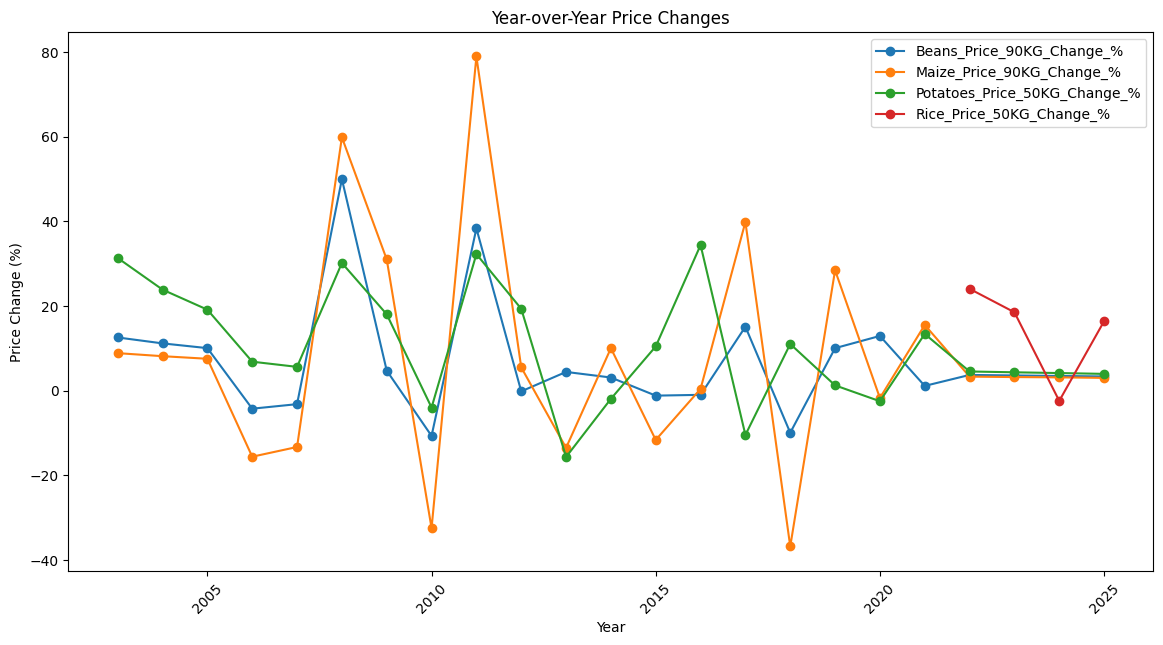

In [16]:
# Plot price changes
plt.figure(figsize=(14,7))
for crop_change in ['Beans_Price_90KG_Change_%', 'Maize_Price_90KG_Change_%', 'Potatoes_Price_50KG_Change_%', 'Rice_Price_50KG_Change_%']:
    plt.plot(data['Year'], data[crop_change], marker='o', linestyle='-', label=crop_change)
plt.title('Year-over-Year Price Changes')
plt.xlabel('Year')
plt.ylabel('Price Change (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


**Insights:**

- Highlight years with high price volatility.
- Correlate volatility with climatic events or other external factors.


## 12. Feature Engineering


 ### 12.1 Feature selection
 